In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
#%matplotlib inline

In [2]:
rs = 10

# Load a dataset

In [3]:
# import a dataset
df = pd.read_csv("./example/dataset.csv")

# Exploratory Data Analysis (EDA)

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
42,4.4,3.2,1.3,0.2,0
60,5.0,2.0,3.5,1.0,1
88,5.6,3.0,4.1,1.3,1
28,5.2,3.4,1.4,0.2,0


In [6]:
df.shape

(100, 5)

In [7]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [8]:
df['target'].value_counts()

0    50
1    50
Name: target, dtype: int64

In [9]:
df.describe(exclude=['int64'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,100.000000,100.000000,100.000000,100.000000
mean,5.471000,3.099000,2.861000,0.786000
std,0.641698,0.478739,1.449549,0.565153
min,4.300000,2.000000,1.000000,0.100000
25%,5.000000,2.800000,1.500000,0.200000
50%,5.400000,3.050000,2.450000,0.800000
75%,5.900000,3.400000,4.325000,1.300000
max,7.000000,4.400000,5.100000,1.800000


In [10]:
pd.DataFrame(df.groupby(by=['target']).describe()).stack().unstack(0)

sepal length (cm)            sepal width (cm)             \
target                 0          1                0          1   
count           50.00000  50.000000        50.000000  50.000000   
mean             5.00600   5.936000         3.428000   2.770000   
std              0.35249   0.516171         0.379064   0.313798   
min              4.30000   4.900000         2.300000   2.000000   
25%              4.80000   5.600000         3.200000   2.525000   
50%              5.00000   5.900000         3.400000   2.800000   
75%              5.20000   6.300000         3.675000   3.000000   
max              5.80000   7.000000         4.400000   3.400000   

       petal length (cm)            petal width (cm)             
target                 0          1                0          1  
count          50.000000  50.000000        50.000000  50.000000  
mean            1.462000   4.260000         0.246000   1.326000  
std             0.173664   0.469911         0.105386   0.197753  
min             1.000000   3.000000         0.100000   1.000000  
25%             1.400000   4.000000         0.200000   1.200000  
50%             1.500000   4.350000         0.200000   1.300000  
75%             1.575000   4.600000         0.300000   1.500000  
max             1.900000   5.100000         0.600000   1.800000

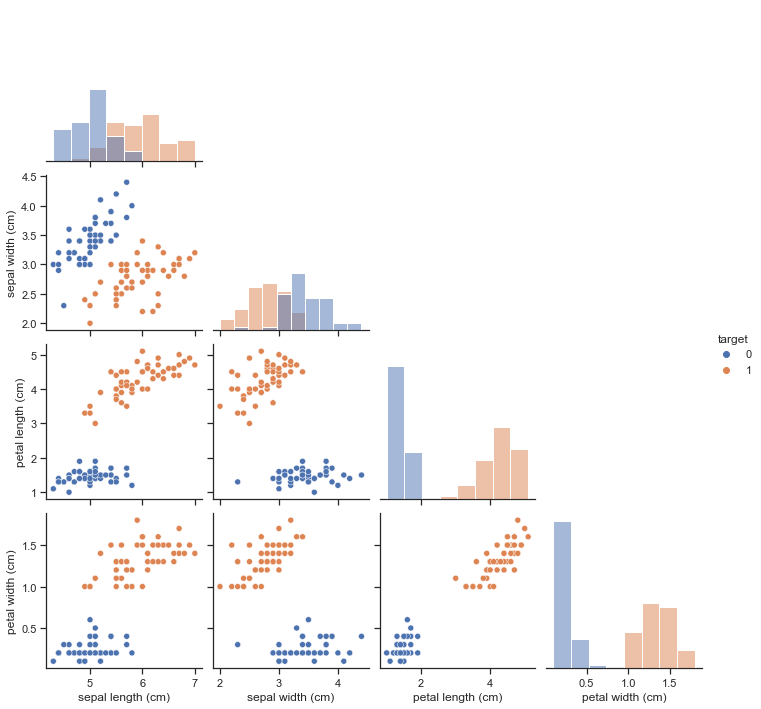

In [11]:
sns.set_theme(style="ticks")
sns.pairplot(df, corner=True, diag_kind="hist", hue="target")

# Training

### Training dataset

In [12]:
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


In [13]:
#X = df.iloc[:,:-1]
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=rs)

In [15]:
X_train.shape

(80, 2)

In [16]:
X_train.sample(5)

,sepal length (cm),sepal width (cm)
87,6.3,2.3
81,5.5,2.4
89,5.5,2.5
32,5.2,4.1
82,5.8,2.7


In [17]:
y_train.value_counts()

1    41
0    39
Name: target, dtype: int64

In [18]:
X_test.shape

(20, 2)

In [19]:
y_test.value_counts()

0    11
1     9
Name: target, dtype: int64

### Perceptron learning

In [20]:
# initialization
model_per = Perceptron()

In [21]:
# optimization
model_per.fit(X_train, y_train)

Perceptron()

In [22]:
# training: performance
y_pred_train = model_per.predict(X_train)
print(metrics.accuracy_score(y_pred_train, y_train))

1.0


numpy.ndarray

In [23]:
# testing: performance
y_pred_test = model_per.predict(X_test)
print(metrics.accuracy_score(y_pred_test, y_test))

0.95


### Visualization: Decision boundary

In [24]:
w = model_per.coef_[0]
#print(w)

In [25]:
w0 = model_per.intercept_
#print(w0)

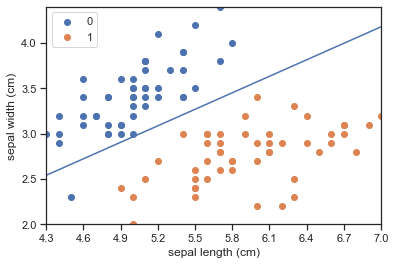

In [26]:
if len(w) == 2:
    x_ticks = np.linspace(min(X.iloc[:,0]),max(X.iloc[:,0]),10)
    ax = plt.subplot(1,1,1)
    ax.set_xticks(x_ticks)
    ax.set_xlim(min(X.iloc[:,0]),max(X.iloc[:,0]))
    ax.set_ylim(min(X.iloc[:,1]),max(X.iloc[:,1]))
    ax.set_xlabel(X.columns[0])
    ax.set_ylabel(X.columns[1])
    plt.scatter(X.iloc[:50,0],X.iloc[:50,1],label='0')
    plt.scatter(X.iloc[50:,0],X.iloc[50:,1],label='1')
    plt.plot(x_ticks, (w[0]*x_ticks + w0)/(-w[1]))
    plt.legend(loc = 'best')